Here, I will extract tangent connectivity and explore some of its properties and implications for our analysis.


In [8]:
%reload_ext autoreload
%autoreload 3

import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from python.acnets.pipeline import ConnectivityPipeline, ConnectivityVectorizer
from ray import tune
from ray.tune.sklearn import TuneSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.model_selection import (GridSearchCV, StratifiedShuffleSplit,
                                     cross_val_score)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC

import seaborn as sns

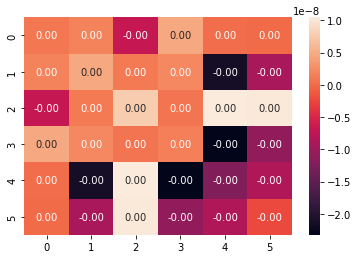

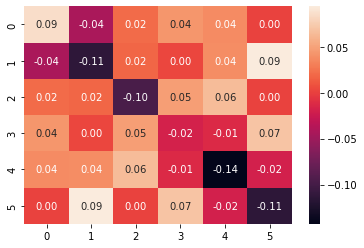

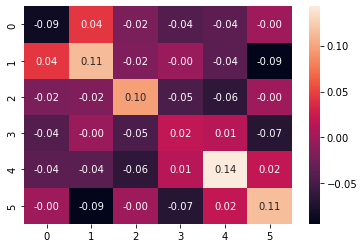

In [48]:
# 1. DATA

subjects = ConnectivityPipeline().transform('all').coords['subject'].values
groups = [s[:4] for s in subjects]  # AVGP or NVGP

X = subjects.reshape(-1, 1)

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(groups)

connectivity_model = ConnectivityPipeline(kind='tangent')

X_conn = connectivity_model.fit_transform('all')

sns.heatmap(X_conn.mean('subject'), annot=True, fmt='.2f')
plt.show()

sns.heatmap(X_conn[y == 0].mean('subject'), annot=True, fmt='.2f')
plt.show()

sns.heatmap(X_conn[y == 1].mean('subject'), annot=True, fmt='.2f')
plt.show()

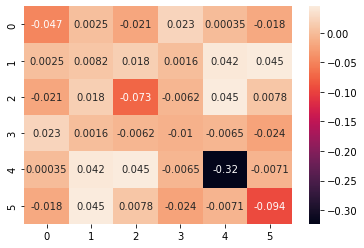

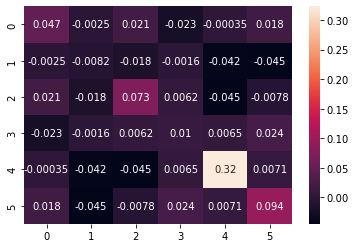

In [50]:

random_subjects = np.random.choice(subjects, size=16, replace=False)


rnd_conn_group1 = X_conn[np.in1d(subjects, random_subjects)].mean('subject')
sns.heatmap(rnd_conn_group1, annot=True)
plt.show()

rnd_conn_group2 = X_conn[~np.in1d(subjects, random_subjects)].mean('subject')
sns.heatmap(rnd_conn_group2, annot=True)
plt.show()



Implication: Splitting the subject into two groups would always results in flipped connectivity, that is their sum would always be zero.